In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats

# Criamos a Base

In [65]:
Base = pd.read_csv('superstore.csv', encoding= 'unicode_escape')        #Lendo os dados
Base = pd.DataFrame(Base)               #Transformando em DataFrame

In [66]:
Base.info()         #Informações sobre a base. Verificando os tipos dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [67]:
Base.describe()         #Descrevendo os dados

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


array([[<AxesSubplot: title={'center': 'Row ID'}>,
        <AxesSubplot: title={'center': 'Postal Code'}>,
        <AxesSubplot: title={'center': 'Sales'}>],
       [<AxesSubplot: title={'center': 'Quantity'}>,
        <AxesSubplot: title={'center': 'Discount'}>,
        <AxesSubplot: title={'center': 'Profit'}>],
       [<AxesSubplot: title={'center': 'Shipping Cost'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

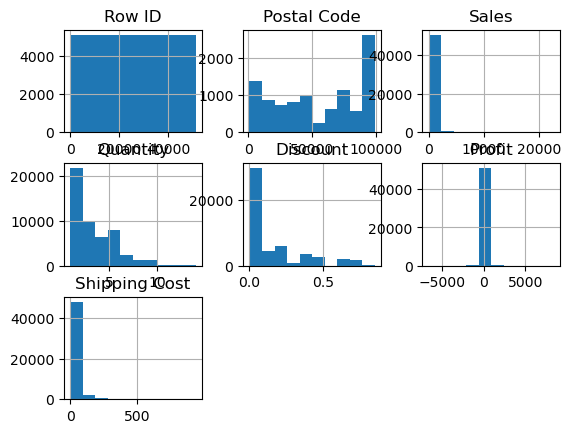

In [68]:
Base.hist()         #Histograma de alguns dados da base

(array([31273.,  9876., 10141.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

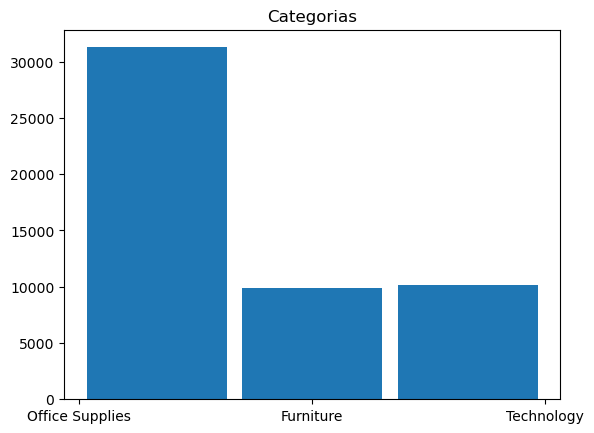

In [69]:
plt.title('Categorias')         #Título do histograma sobre as categorias
plt.hist(Base.Category,3,rwidth=0.9)        #Criando histograma de categorias

## Inicialmente separamos uma base com um produto para analisar as colunas e a relação entre os dados.

In [70]:
Base2 = Base[Base['Product Name'] == 'Acme Trimmer, High Speed']        #Criando base de apenas um produto para verificar os dados
Base2.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
4516,18608,ES-2012-4804562,3/11/2012,10/11/2012,Standard Class,MP-17470,Mark Packer,Home Office,Leeds,England,...,OFF-SU-10001879,Office Supplies,Supplies,"Acme Trimmer, High Speed",44.580,1,0.0,12.900,3.59,Low
6105,44863,KG-2012-3160,8/5/2012,10/5/2012,Second Class,RP-9270,Rachel Payne,Corporate,Bishkek,Bishkek,...,OFF-ACM-10003978,Office Supplies,Supplies,"Acme Trimmer, High Speed",89.160,2,0.0,25.800,28.42,Critical
6500,29049,IN-2012-70157,9/6/2012,13-06-2012,Standard Class,ML-18040,Michelle Lonsdale,Corporate,Kota Kinabalu,Sabah,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",312.060,7,0.0,115.290,48.63,High
7214,5529,MX-2012-126396,11/6/2012,16-06-2012,Standard Class,CC-12430,Chuck Clark,Home Office,La Ceiba,Atlántida,...,OFF-SU-10002983,Office Supplies,Supplies,"Acme Trimmer, High Speed",17.832,1,0.4,-8.628,1.40,Medium


## Criamos uma nova coluna com o preço dos produtos

In [71]:
Base2['Price'] = (Base2['Sales']/(1-Base2['Discount'])) / Base2['Quantity']         #Dividindo o sales pela quantity 
Base2['Price Discount'] = Base2['Sales'] / Base2['Quantity']
Base2.head(5)                                               #Criamos a coluna price para identificar o preço e comparar algumas informações

C:\Users\vande\AppData\Local\Temp\ipykernel_10700\1131635238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base2['Price'] = (Base2['Sales']/(1-Base2['Discount'])) / Base2['Quantity']         #Dividindo o sales pela quantity
C:\Users\vande\AppData\Local\Temp\ipykernel_10700\1131635238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base2['Price Discount'] = Base2['Sales'] / Base2['Quantity']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Price Discount
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,40.122
4516,18608,ES-2012-4804562,3/11/2012,10/11/2012,Standard Class,MP-17470,Mark Packer,Home Office,Leeds,England,...,Supplies,"Acme Trimmer, High Speed",44.580,1,0.0,12.900,3.59,Low,44.58,44.580
6105,44863,KG-2012-3160,8/5/2012,10/5/2012,Second Class,RP-9270,Rachel Payne,Corporate,Bishkek,Bishkek,...,Supplies,"Acme Trimmer, High Speed",89.160,2,0.0,25.800,28.42,Critical,44.58,44.580
6500,29049,IN-2012-70157,9/6/2012,13-06-2012,Standard Class,ML-18040,Michelle Lonsdale,Corporate,Kota Kinabalu,Sabah,...,Supplies,"Acme Trimmer, High Speed",312.060,7,0.0,115.290,48.63,High,44.58,44.580
7214,5529,MX-2012-126396,11/6/2012,16-06-2012,Standard Class,CC-12430,Chuck Clark,Home Office,La Ceiba,Atlántida,...,Supplies,"Acme Trimmer, High Speed",17.832,1,0.4,-8.628,1.40,Medium,29.72,17.832


In [72]:
Base2 = Base2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,20,21,22,23]]  #Reorganizando as colunas


## Criamos uma nova coluna com o custo do produto

In [73]:
Base2['Cost'] = (Base2['Sales']-Base2['Profit']) / Base2['Quantity']        #Criando nova coluna para identificar o custo do produto


C:\Users\vande\AppData\Local\Temp\ipykernel_10700\4269417299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Base2['Cost'] = (Base2['Sales']-Base2['Profit']) / Base2['Quantity']        #Criando nova coluna para identificar o custo do produto


In [74]:
Base2 = Base2.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26,20,21,22,23]]        #Reorganizando as colunas

In [75]:
with pd.option_context("display.max_columns", None):            #Mostrando todas as colunas do Dataframe
    display(Base2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Shipping Cost,Order Priority,Cost,Price,Price Discount,Discount,Profit
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,9.72,Medium,28.11,44.58,40.122,0.1,36.036
4516,18608,ES-2012-4804562,3/11/2012,10/11/2012,Standard Class,MP-17470,Mark Packer,Home Office,Leeds,England,United Kingdom,NaN,EU,North,OFF-SU-10001879,Office Supplies,Supplies,"Acme Trimmer, High Speed",44.580,1,3.59,Low,31.68,44.58,44.580,0.0,12.900
6105,44863,KG-2012-3160,8/5/2012,10/5/2012,Second Class,RP-9270,Rachel Payne,Corporate,Bishkek,Bishkek,Kyrgyzstan,NaN,EMEA,EMEA,OFF-ACM-10003978,Office Supplies,Supplies,"Acme Trimmer, High Speed",89.160,2,28.42,Critical,31.68,44.58,44.580,0.0,25.800
6500,29049,IN-2012-70157,9/6/2012,13-06-2012,Standard Class,ML-18040,Michelle Lonsdale,Corporate,Kota Kinabalu,Sabah,Malaysia,NaN,APAC,Southeast Asia,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",312.060,7,48.63,High,28.11,44.58,44.580,0.0,115.290
7214,5529,MX-2012-126396,11/6/2012,16-06-2012,Standard Class,CC-12430,Chuck Clark,Home Office,La Ceiba,Atlántida,Honduras,NaN,LATAM,Central,OFF-SU-10002983,Office Supplies,Supplies,"Acme Trimmer, High Speed",17.832,1,1.40,Medium,26.46,29.72,17.832,0.4,-8.628
7386,30396,IN-2012-85193,11/12/2012,15-12-2012,Standard Class,CB-12535,Claudia Bergmann,Corporate,Timaru,Canterbury,New Zealand,NaN,APAC,Oceania,OFF-SU-10001124,Office Supplies,Supplies,"Acme Trimmer, High Speed",356.640,8,28.69,Medium,28.11,44.58,44.580,0.0,131.760
10961,13104,ES-2013-5507103,8/2/2013,13-02-2013,Standard Class,GH-14410,Gary Hansen,Home Office,Bergamo,Lombardy,Italy,NaN,EU,South,OFF-SU-10001879,Office Supplies,Supplies,"Acme Trimmer, High Speed",178.320,4,16.62,Medium,31.68,44.58,44.580,0.0,51.600
19261,5240,US-2014-146458,11/9/2014,16-09-2014,Standard Class,PM-18940,Paul MacIntyre,Consumer,Santo Domingo,Santo Domingo,Dominican Republic,NaN,LATAM,Caribbean,OFF-SU-10002983,Office Supplies,Supplies,"Acme Trimmer, High Speed",71.328,3,7.43,High,26.46,29.72,23.776,0.2,-8.052
25385,24986,IN-2013-59958,16-03-2013,22-03-2013,Standard Class,DL-12865,Dan Lawera,Consumer,Nanchong,Sichuan,China,NaN,APAC,North Asia,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",178.320,4,24.13,Low,28.11,44.58,44.580,0.0,65.880
26985,3981,MX-2014-145072,17-03-2014,22-03-2014,Second Class,Dp-13240,Dean percer,Home Office,Contramaestre,Santiago de Cuba,Cuba,NaN,LATAM,Caribbean,OFF-SU-10002983,Office Supplies,Supplies,"Acme Trimmer, High Speed",118.880,4,17.30,Medium,26.46,29.72,29.720,0.0,13.040


In [76]:
Base2['Price'].describe()

count    20.000000
mean     41.608000
std       6.098415
min      29.720000
25%      44.580000
50%      44.580000
75%      44.580000
max      44.580000
Name: Price, dtype: float64

##  Agrupamos por lucro todos os mercados do produto especificado acima.

In [77]:
Base2.groupby('Market')['Profit'].sum()         #Soma de lucro dos mercados referente ao produto mencionado acima(apenas um produto)

Market
APAC      394.29
Africa     25.80
EMEA       90.30
EU         87.93
LATAM      15.92
Name: Profit, dtype: float64

## Abaixo agrupamos todos os produtos da base principal que geram prejuízo e que possivelmente podem ser retirados do mercado para reduzir o número de produtos a venda com o intuito de gerar maior lucratividade.

In [78]:
Base_prod = Base.groupby('Product Name').sum()          #Agrupando e somando os dados
Base_prod = Base_prod[Base_prod['Profit'] < 0]          #Pegando somente os produtos com lucro abaixo de zero
Base_prod = Base_prod['Profit']                         #Ajustando o dataframe
Base_prod.round().sort_values()                         #Arredondando e organizando os valores

C:\Users\vande\AppData\Local\Temp\ipykernel_10700\2630772110.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Base_prod = Base.groupby('Product Name').sum()          #Agrupando e somando os dados


Product Name
Cubify CubeX 3D Printer Double Head Print                               -8880.0
Lexmark MX611dhe Monochrome Laser Printer                               -4590.0
Motorola Smart Phone, Cordless                                          -4447.0
Cubify CubeX 3D Printer Triple Head Print                               -3840.0
Bevis Round Table, Adjustable Height                                    -3650.0
                                                                          ...  
SanDisk Cruzer 8 GB USB Flash Drive                                        -1.0
Rubber Band Ball                                                           -0.0
Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2" X 11"      -0.0
Premier Electric Letter Opener                                             -0.0
Stiletto Ruler, Serrated                                                   -0.0
Name: Profit, Length: 676, dtype: float64

## Abaixo agrupamos os lucros de cada mercado

In [79]:
Base.groupby('Market')['Profit'].sum()      #Soma do lucro de mercado de todos os produtos


Market
APAC      436000.04900
Africa     88871.63100
Canada     17817.39000
EMEA       43897.97100
EU        372829.74150
LATAM     221643.48708
US        286397.02170
Name: Profit, dtype: float64

## Abaixo agrupamos por sub-categoria as lucratividades. Foi possível perceber que a sub-categoria tables gera prejuízo.

In [80]:
Base_cat = Base.groupby(['Sub-Category'])['Profit'].sum().sort_values()     #Agrupando todos as subcategorias baseados no lucro
Base_cat                                                                    #identificando que Tables gera prejuízo

Sub-Category
Tables         -64083.38870
Fasteners       11525.42410
Labels          15010.51200
Supplies        22583.26310
Envelopes       29601.11630
Furnishings     46967.42550
Art             57953.91090
Machines        58867.87300
Paper           59207.68270
Binders         72449.84600
Storage        108461.48980
Accessories    129626.30620
Chairs         140396.26750
Appliances     141680.58940
Bookcases      161924.41950
Phones         216717.00580
Copiers        258567.54818
Name: Profit, dtype: float64

## Com base na informação acima, agrupamos todos os produtos que fazem parte da sub-categoria tables e podemos perceber que alguns geram prejuízo e outros não. Portanto entendemos que um possível plano ação seria não retirar todos os produtos desta categoria, pois pode haver uma relação de vendas entre cadeiras e mesas.

In [81]:

Base_tables = Base[Base['Sub-Category'] == 'Tables']
#Base_tables['Percent Profit'] = (Base_tables['Profit']*100)/Base_tables['Sales']
Base_tables = Base_tables.groupby('Product Name')['Profit'].sum()
Base_tables.sort_values()
Base_tables

Product Name
Anderson Hickey Conga Table Tops & Accessories                                       -17.5145
BPI Conference Tables                                                               -795.9725
Balt Solid Wood Rectangular Table                                                   -216.2545
Balt Solid Wood Round Tables                                                       -1201.0581
Balt Split Level Computer Training Table                                            -357.9750
                                                                                      ...    
Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer       -1147.4000
Riverside Furniture Stanwyck Manor Table Series                                     -415.9325
SAFCO PlanMaster Boards, 60w x 37-1/2d, White Melamine                                54.7164
SAFCO PlanMaster Heigh-Adjustable Drafting Table Base, 43w x 30d x 30-37h, Black     608.0430
Safco Drafting Table                           

## Separando a subcategoria tables por mercado, podemos perceber que nem todos eles geram prejuízo. Dessa forma entendemos que um possível plano de ação seria manter a atuação nos mercados em que há lucratividade na venda das mesas. 

In [82]:
Base_cat2 = Base[Base['Sub-Category'] == 'Tables']
Base_cat2 = Base_cat2.groupby(['Market','Category','Sub-Category']).sum()
Base_cat2

C:\Users\vande\AppData\Local\Temp\ipykernel_10700\4205636004.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Base_cat2 = Base_cat2.groupby(['Market','Category','Sub-Category']).sum()


,,,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Market,Category,Sub-Category,,,,,,,
APAC,Furniture,Tables,4843183,0.0,225098.8119,684,63.12,-20128.7481,24572.59
Africa,Furniture,Tables,1718373,0.0,34532.5950,87,4.90,4010.6850,3032.47
Canada,Furniture,Tables,93328,0.0,849.3600,2,0.00,300.1800,162.17
EMEA,Furniture,Tables,2117440,0.0,39333.9210,102,7.40,2764.2510,5339.08
EU,Furniture,Tables,1347181,0.0,105381.3765,339,33.45,-20998.4235,8974.28
LATAM,Furniture,Tables,956228,0.0,144880.3280,628,58.10,-12305.8520,15466.82
US,Furniture,Tables,11556088,18607828.0,206965.5320,1241,83.35,-17725.4811,22314.05


## Observamos 3788 produtos gerando lucro de 1467457.29128 antes da remoção dos produtos que geram prejuízo.

In [83]:
base_lucro = Base.groupby(['Product Name']).sum()
print('Total de produtos: ',base_lucro['Profit'].count())           #Total de produtos
print('Total de lucro: ',base_lucro['Profit'].sum())                #Total de lucro


Total de produtos:  3788
Total de lucro:  1467457.29128


C:\Users\vande\AppData\Local\Temp\ipykernel_10700\2245992554.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_lucro = Base.groupby(['Product Name']).sum()


## Observamos 3107 produtos gerando lucro de 1715300.6956200001 após remoção dos produtos que geram prejuízo. 

In [84]:
base_preju = base_lucro[base_lucro['Profit'] > 0]
print(base_preju['Profit'].count())                 #Total de produtos restantes
print(base_preju['Profit'].sum())                   #Total de lucro sem os produtos que geram prejuízo

3107
1715300.6956200001


## Subcategoria tables antes da remoção das mesas que geram prejuízo

In [85]:
Base_tables.sum()       

-64083.3887

## Subcategoria tables após remoção das mesas que geram prejuízo

In [86]:
Base_tables_lucro = Base_tables[Base_tables > 0]        #Pegando somente os produtos que possuem lucro maior que zero
Base_tables_lucro.sum()

28034.0424

## Total de produtos e lucro por ID

In [87]:
# Agrupar por Product ID e retirar os produtos que geram prejuízo.
base_lucro_id = Base.groupby(['Product ID']).sum()
print('Total de produtos por ID: ',base_lucro_id['Profit'].count())           #Total de produtos
print('Total de lucro por ID: ',base_lucro_id['Profit'].sum())                #Total de lucro


Total de produtos por ID:  10292
Total de lucro por ID:  1467457.29128


C:\Users\vande\AppData\Local\Temp\ipykernel_10700\1528371192.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_lucro_id = Base.groupby(['Product ID']).sum()


## Total de produtos e lucro por ID após retirada do prejuízo.

In [88]:
base_preju_id = base_lucro_id[base_lucro_id['Profit'] > 0]
print(base_preju_id['Profit'].count())                 #Total de produtos restantes
print(base_preju_id['Profit'].sum())   

7359
2011754.99976


## Criando base de customers e segmentando a partir da porcentagem de lucro. 

In [89]:
base_customer = Base.filter(['Customer ID','Customer Name','Profit','Sales'])
base_customer = base_customer.groupby(['Customer Name']).sum()
base_customer['Percent Profit'] = (base_customer['Profit']*100)/base_customer['Sales']
base_customer.loc[base_customer['Sales']*(10/100) > base_customer['Profit'], 'Segmento'] = 'Baixo Valor'  #Menor que 10% de lucro
base_customer.loc[base_customer['Sales']*(10/100) <= base_customer['Profit'], 'Segmento'] = 'Medio Valor' #Maior que 10% e menor que 20%
base_customer.loc[base_customer['Sales']*(20/100) <= base_customer['Profit'], 'Segmento'] = 'Alto Valor'  #Maior que 20 de lucro

base_customer


C:\Users\vande\AppData\Local\Temp\ipykernel_10700\3572971529.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_customer = base_customer.groupby(['Customer Name']).sum()


,Profit,Sales,Percent Profit,Segmento
Customer Name,,,,
Aaron Bergman,4683.20800,24644.62750,19.002957,Medio Valor
Aaron Hawkins,2450.92904,20759.51384,11.806293,Medio Valor
Aaron Smayling,369.16180,14212.62840,2.597421,Baixo Valor
Adam Bellavance,4979.97690,20186.77840,24.669498,Alto Valor
Adam Hart,1902.03342,21718.20142,8.757785,Baixo Valor
...,...,...,...,...
Xylona Preis,1304.72260,12198.95060,10.695368,Medio Valor
Yana Sorensen,3450.40630,20032.43800,17.224096,Medio Valor
Yoseph Carroll,4347.17660,20164.37760,21.558695,Alto Valor


## Valores referentes aos segmentos(lucros e vendas)

In [90]:
x = base_customer.groupby(['Segmento']).sum().round()
x['Percent Profit'] = (x['Profit']*100)/x['Sales']
x
#Criar porcentagem do lucro em cima do valor

,Profit,Sales,Percent Profit
Segmento,,,
Alto Valor,373139.0,1621040.0,23.018494
Baixo Valor,164177.0,4600862.0,3.568397
Medio Valor,930141.0,6420600.0,14.486824


## Identificando a última data do Dataframe

In [91]:
data_fim = pd.to_datetime(Base['Order Date']).max()
print(data_fim)

2014-12-31 00:00:00


C:\Users\vande\AppData\Local\Temp\ipykernel_10700\1680743693.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_fim = pd.to_datetime(Base['Order Date']).max()


## Criando base com as datas da última venda dos customers.

In [92]:
base_order = Base.filter(['Order Date','Customer Name'])
base_order['Order Date'] = pd.to_datetime(base_order['Order Date'])
x = base_order.groupby(['Customer Name']).count()
base_order = base_order.groupby(['Customer Name']).max()

base_order['Total Pedidos'] = x
base_order

C:\Users\vande\AppData\Local\Temp\ipykernel_10700\1552073220.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  base_order['Order Date'] = pd.to_datetime(base_order['Order Date'])


,Order Date,Total Pedidos
Customer Name,,
Aaron Bergman,2014-12-15,89
Aaron Hawkins,2014-12-19,56
Aaron Smayling,2014-12-05,60
Adam Bellavance,2014-12-06,68
Adam Hart,2014-12-29,84
...,...,...
Xylona Preis,2014-11-18,61
Yana Sorensen,2014-12-27,62
Yoseph Carroll,2014-12-27,56


## Criando a base de Segmento e Frequencia. Dessa forma podemos analisar cada customer baseado no lucro que gera e a frequência com que vende. 

In [93]:
base_order_customer = pd.merge(base_customer, base_order, how = 'left', on = 'Customer Name')
x = base_order_customer

#x['Frequencia'] = base_order_customer[base_order_customer['Order Date'] < data_fim - dt.timedelta(days=180)]
x.loc[x['Order Date'] <= data_fim - dt.timedelta(days=60), 'Frequencia'] = 'Baixa Frequencia'  #Ultima venda há mais de 60 dias
x.loc[x['Order Date'] > data_fim - dt.timedelta(days=60), 'Frequencia'] = 'Media Frequencia' #Ultima venda há menos de 60 dias
x.loc[x['Order Date'] > data_fim - dt.timedelta(days=30), 'Frequencia'] = 'Alta Frequencia'  #Ultima venda há mais de 30 dias
x



,Profit,Sales,Percent Profit,Segmento,Order Date,Total Pedidos,Frequencia
Customer Name,,,,,,,
Aaron Bergman,4683.20800,24644.62750,19.002957,Medio Valor,2014-12-15,89,Alta Frequencia
Aaron Hawkins,2450.92904,20759.51384,11.806293,Medio Valor,2014-12-19,56,Alta Frequencia
Aaron Smayling,369.16180,14212.62840,2.597421,Baixo Valor,2014-12-05,60,Alta Frequencia
Adam Bellavance,4979.97690,20186.77840,24.669498,Alto Valor,2014-12-06,68,Alta Frequencia
Adam Hart,1902.03342,21718.20142,8.757785,Baixo Valor,2014-12-29,84,Alta Frequencia
...,...,...,...,...,...,...,...
Xylona Preis,1304.72260,12198.95060,10.695368,Medio Valor,2014-11-18,61,Media Frequencia
Yana Sorensen,3450.40630,20032.43800,17.224096,Medio Valor,2014-12-27,62,Alta Frequencia
Yoseph Carroll,4347.17660,20164.37760,21.558695,Alto Valor,2014-12-27,56,Alta Frequencia


In [94]:
Base_price = Base
Base_price['Price'] = (Base_price['Sales']/(1-Base_price['Discount'])) / Base_price['Quantity']         #Dividindo o sales pela quantity 
Base_price['Price Discount'] = Base_price['Sales'] / Base_price['Quantity']
Base_price['Cost'] = (Base_price['Sales']-Base_price['Profit']) / Base_price['Quantity']
Base_price['Percent Profit'] = round((Base_price['Profit']*100)/Base_price['Sales'],2)
Base_price = Base_price.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,24,25,26,20,21,27,22,23]]
display(Base_price)  

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Sales,Quantity,Price,Price Discount,Cost,Discount,Profit,Percent Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,408.300,2,204.15,204.150,151.0800,0.0,106.1400,26.00,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,120.366,3,44.58,40.122,28.1100,0.1,36.0360,29.94,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,66.120,4,16.53,16.530,9.1200,0.0,29.6400,44.83,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,44.865,3,29.91,14.955,23.6400,0.5,-26.0550,-58.07,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,113.670,5,25.26,22.734,15.1800,0.1,37.7700,33.23,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,13.904,2,8.69,6.952,4.6926,0.2,4.5188,32.50,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,3.990,1,3.99,3.990,3.5700,0.0,0.4200,10.53,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,26.400,3,8.80,8.800,4.6800,0.0,12.3600,46.82,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,7.120,1,7.12,7.120,6.5600,0.0,0.5600,7.87,0.20,Medium


## Gráfico de correlação da base principal

C:\Users\vande\AppData\Local\Temp\ipykernel_10700\263273800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Base.corr().round(2), annot = True)


<AxesSubplot: >

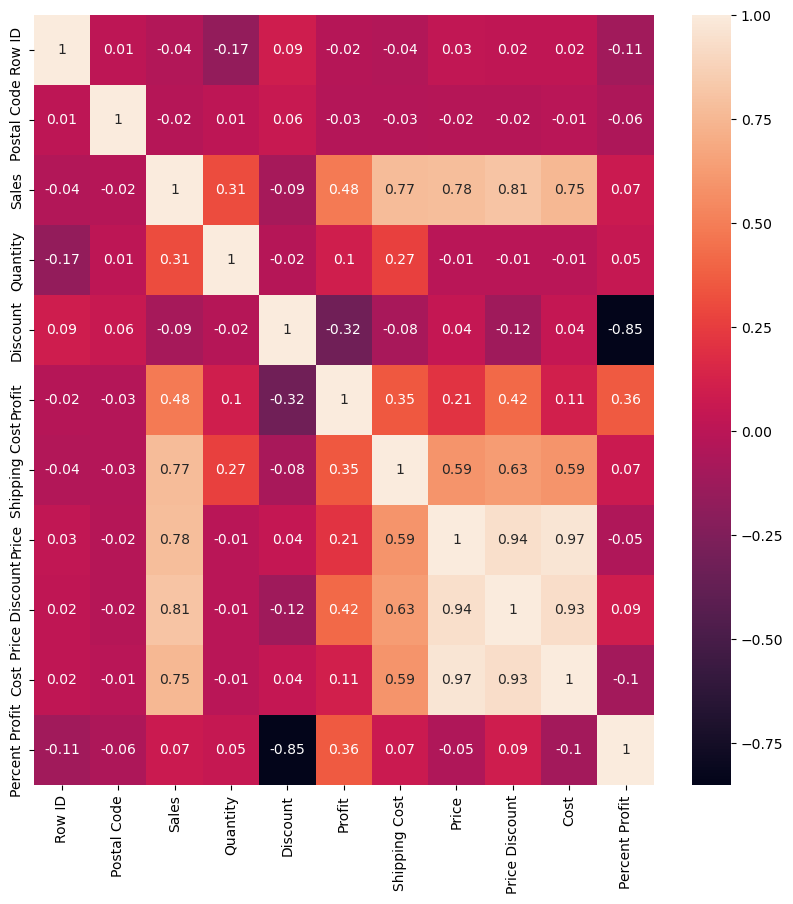

In [95]:
plt.figure(figsize=(10,10))             #Criando imagem e definindo tamanho
sns.heatmap(Base.corr().round(2), annot = True)

## ANOVA

In [114]:
Base_anova = Base_price.filter(['Market','Percent Profit'])
Base_anova['Market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'US', 'LATAM', 'Canada'],
      dtype=object)

In [153]:

Africa = Base_anova[Base_anova['Market'] == 'Africa']
Africa = list(Africa['Percent Profit'])
Apac = Base_anova[Base_anova['Market'] == 'APAC']
Apac = list(Apac['Percent Profit'])
Emea = Base_anova[Base_anova['Market'] == 'EMEA']
Emea = list(Emea['Percent Profit'])
Eu = Base_anova[Base_anova['Market'] == 'EU']
Eu = list(Eu['Percent Profit'])
Us = Base_anova[Base_anova['Market'] == 'US']
Us = list(Us['Percent Profit'])
Latam = Base_anova[Base_anova['Market'] == 'LATAM']
Latam = list(Latam['Percent Profit'])
Canada = Base_anova[Base_anova['Market'] == 'Canada']
Canada = list(Canada['Percent Profit'])


lista = list(zip(Africa,Apac,Emea,Eu,Us,Latam,Canada))

# converte uma lista de tuplas num DataFrame
Anova = pd.DataFrame(lista, columns=['Africa','Apac','Emea','Eu','Us','Latam','Canada'])
Anova

,Africa,Apac,Emea,Eu,Us,Latam,Canada
0,26.00,29.94,44.83,-58.07,1.18,5.00,13.00
1,45.00,33.23,47.97,10.96,-27.14,-23.34,42.99
2,-113.41,27.77,17.99,25.98,11.25,-10.28,24.99
3,27.76,24.98,17.00,0.00,-11.43,-18.36,8.96
4,39.78,41.98,20.99,50.00,0.00,-55.07,19.90
...,...,...,...,...,...,...,...
379,-96.83,30.99,10.53,37.00,8.75,22.50,29.82
380,35.96,44.99,-100.27,19.87,-225.00,12.98,17.91
381,-106.70,30.96,33.81,12.90,-45.00,0.00,25.97
382,25.99,41.96,14.99,45.99,-175.00,-100.00,14.95


In [169]:
stats.f_oneway(Africa,Apac,Emea,Eu,Us,Latam,Canada)

F_onewayResult(statistic=370.32709801952217, pvalue=0.0)

In [170]:
stats.f_oneway(Africa,Apac,Eu,Us,Latam,Canada)

F_onewayResult(statistic=281.9435206193925, pvalue=3.852411147223649e-298)

In [ ]:
# retirar todos os produtos de tables que geram prejuízo e analisar a lucratividade depois - OK
# Segmentar os customers e verificar valores de compra/venda/lucratividade - OK
# Segmentar por frequencia de vendas - OK
# Agrupar por Product ID e retirar os produtos que geram prejuízo. OK
# Colocar porcentagem dos segmentos(lucro em cima do valor) OK
# Colocar total de pedidos por vendedor. OK
# gerar teste de correlação de toda a base. OK
# verificar possibilidade de fazer ANOVA das lucratividades por mercado, categorias, subcategorias(tables)
# ANOVA dos mercados por tables baseado na porcentagem de lucro e profit

